In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [8]:
# Load datasets
print("Loading datasets...")
background = np.load('/Users/tatewaugh/Desktop/gravity/data/background.npz')['data']
bbh = np.load('/Users/tatewaugh/Desktop/gravity/data/bbh_for_challenge.npy')
sglf = np.load('/Users/tatewaugh/Desktop/gravity/data/sglf_for_challenge.npy')

def normalize_data(data):
    stds = np.std(data, axis=-1)[:, :, np.newaxis]
    return data / stds

background = normalize_data(background)
bbh = normalize_data(bbh)
sglf = normalize_data(sglf)

# Split detector streams
h1_background = background[:, 0, :]  # Hanford
l1_background = background[:, 1, :]  # Livingston

h1_bbh = bbh[:, 0, :]
l1_bbh = bbh[:, 1, :]

h1_sglf = sglf[:, 0, :]
l1_sglf = sglf[:, 1, :]


# Constants for our data
SAMPLE_RATE = 4096
SEGMENT_LENGTH = 200  
SEGMENT_DURATION_MS = 50  
N_DETECTORS = 2

Loading datasets...



Dataset Shapes:
Background: (100000, 2, 200)
BBH: (100000, 2, 200)
Sine-Gaussian: (100000, 2, 200)


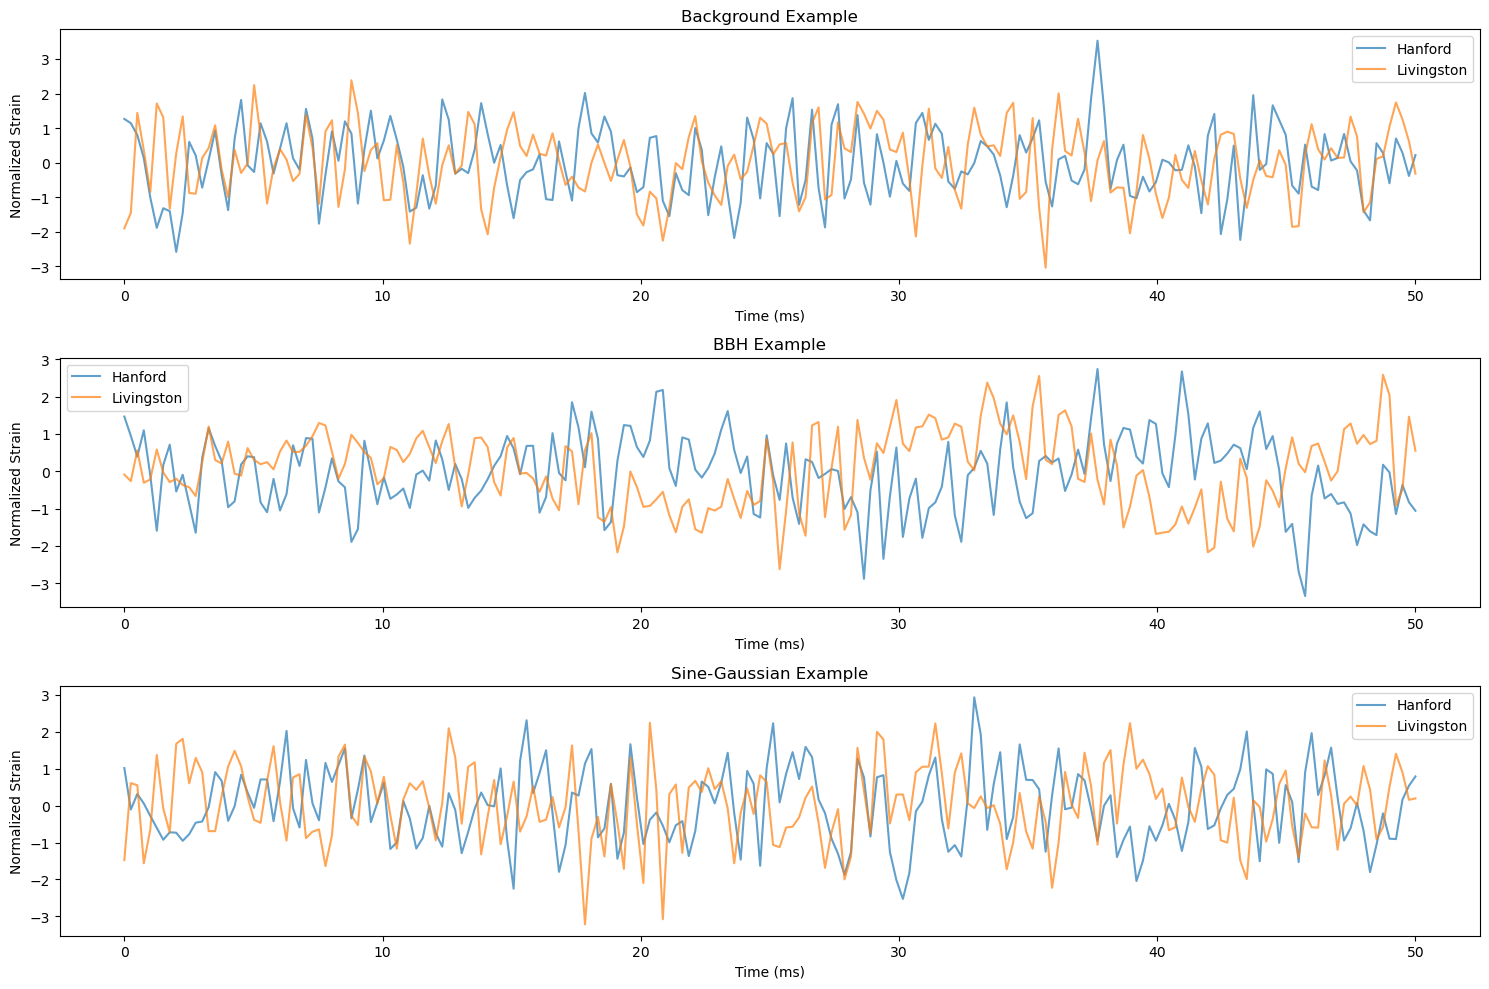


Basic Statistics:

Hanford (H1):
Background - mean: -0.000, std: 1.000
BBH - mean: -0.000, std: 1.001
SG - mean: -0.000, std: 1.000

Livingston (L1):
Background - mean: 0.000, std: 1.000
BBH - mean: -0.000, std: 1.001
SG - mean: -0.000, std: 1.000


In [9]:
print("\nDataset Shapes:")
print(f"Background: {background.shape}")
print(f"BBH: {bbh.shape}")
print(f"Sine-Gaussian: {sglf.shape}")

time_ms = np.linspace(0, 50, 200) 
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(time_ms, h1_background[0], label='Hanford', alpha=0.7)
plt.plot(time_ms, l1_background[0], label='Livingston', alpha=0.7)
plt.title('Background Example')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Strain')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_ms, h1_bbh[0], label='Hanford', alpha=0.7)
plt.plot(time_ms, l1_bbh[0], label='Livingston', alpha=0.7)
plt.title('BBH Example')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Strain')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_ms, h1_sglf[0], label='Hanford', alpha=0.7)
plt.plot(time_ms, l1_sglf[0], label='Livingston', alpha=0.7)
plt.title('Sine-Gaussian Example')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Strain')
plt.legend()

plt.tight_layout()
plt.show()

print("\nBasic Statistics:")
print("\nHanford (H1):")
print(f"Background - mean: {h1_background.mean():.3f}, std: {h1_background.std():.3f}")
print(f"BBH - mean: {h1_bbh.mean():.3f}, std: {h1_bbh.std():.3f}")
print(f"SG - mean: {h1_sglf.mean():.3f}, std: {h1_sglf.std():.3f}")
print("\nLivingston (L1):")
print(f"Background - mean: {l1_background.mean():.3f}, std: {l1_background.std():.3f}")
print(f"BBH - mean: {l1_bbh.mean():.3f}, std: {l1_bbh.std():.3f}")
print(f"SG - mean: {l1_sglf.mean():.3f}, std: {l1_sglf.std():.3f}")